In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df = pd.read_excel(r'C:\Users\Lenovo\SSN Study Materials\Processed Dataset\Car Price Prediction.xlsx')

In [3]:
df

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.000000,111.0,5000.0,21.0,27.0,13495.0
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.000000,111.0,5000.0,21.0,27.0,16500.0
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.000000,154.0,5000.0,19.0,26.0,16500.0
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.000000,102.0,5500.0,24.0,30.0,13950.0
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.000000,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.500000,114.0,5400.0,23.0,28.0,16845.0
201,201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.700000,160.0,5300.0,19.0,25.0,19045.0
202,202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.800000,134.0,5500.0,18.0,23.0,21485.0
203,203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,10.142537,106.0,4800.0,26.0,27.0,22470.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        205 non-null    int64  
 1   car_ID            205 non-null    int64  
 2   symboling         205 non-null    int64  
 3   CarName           205 non-null    object 
 4   fueltype          205 non-null    object 
 5   aspiration        205 non-null    object 
 6   doornumber        205 non-null    object 
 7   carbody           205 non-null    object 
 8   drivewheel        205 non-null    object 
 9   enginelocation    205 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [5]:
df.isnull().sum()

Unnamed: 0          0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

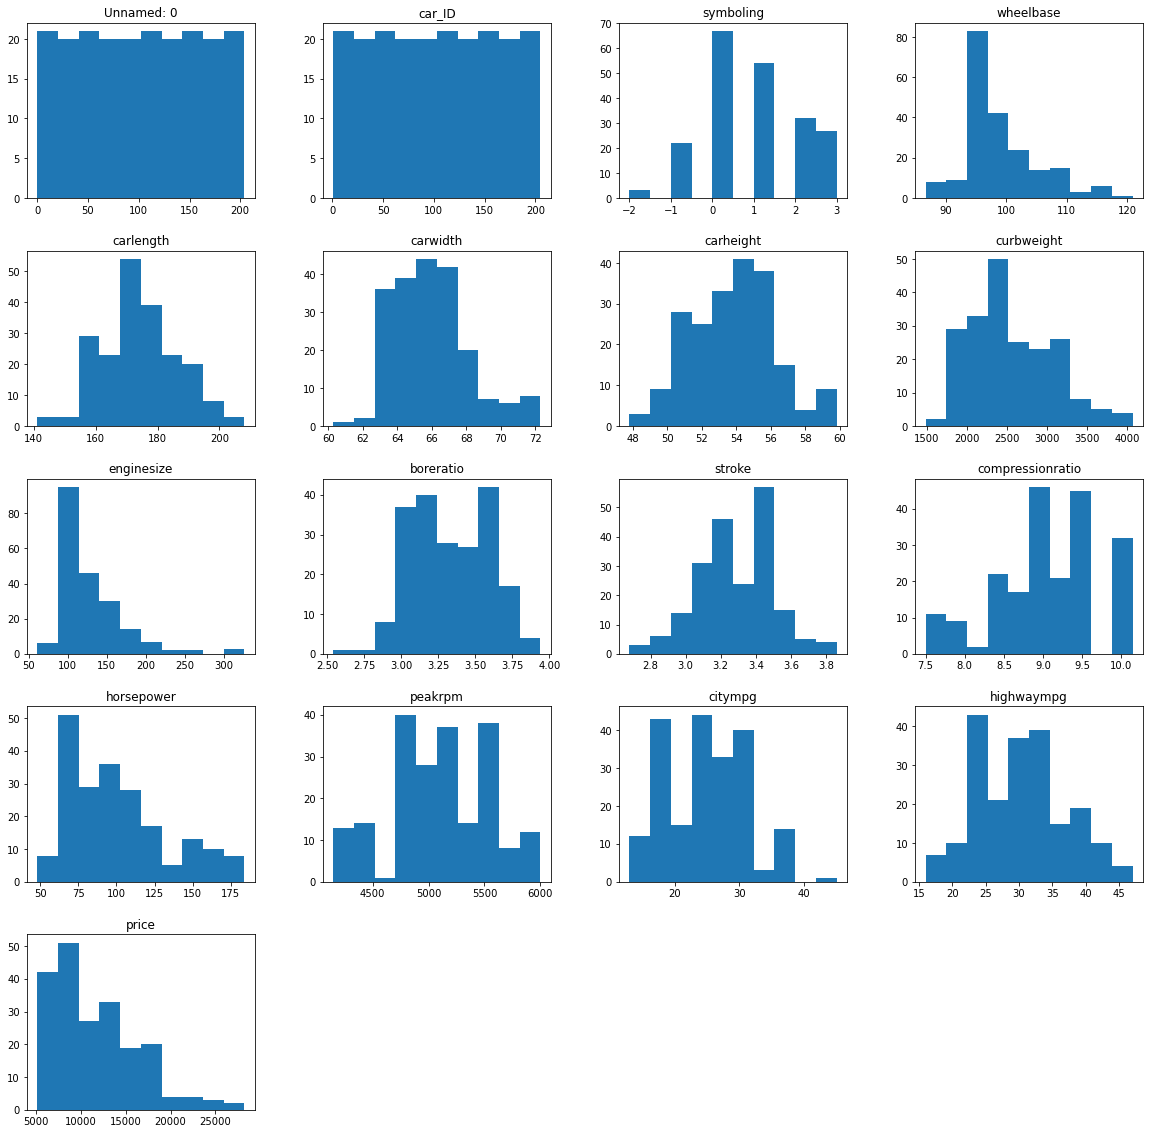

In [6]:
df.hist(grid=False,
       figsize=(20, 20),
       bins=10)
plt.show()

In [7]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Unnamed: 0,0.000000,-1.200000
car_ID,0.000000,-1.200000
symboling,0.211072,-0.676271
wheelbase,1.050214,1.017039
carlength,0.155954,-0.082895
carwidth,0.904003,0.702764
carheight,0.063123,-0.443812
curbweight,0.681398,-0.042854
enginesize,1.947655,5.305682
boreratio,0.020156,-0.785042


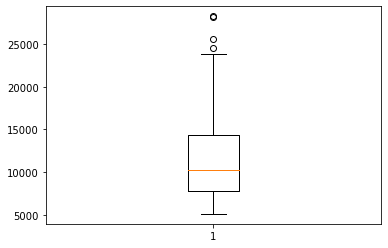

In [8]:
plt.boxplot(df['price'])
plt.show()

In [9]:
#For column price
Q1_price = df.price.quantile(0.25)
Q3_price = df.price.quantile(0.75)
IQR_price = Q3_price-Q1_price

lower_limit_price = Q1_price-1.5*IQR_price
upper_limit_price = Q3_price+1.5*IQR_price
b_price = upper_limit_price

for x in ['price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_price
    df.loc[df[x] > max,x] = b_price

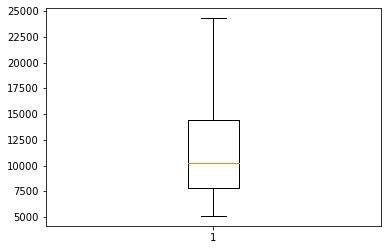

In [10]:
plt.boxplot(df['price'])
plt.show()

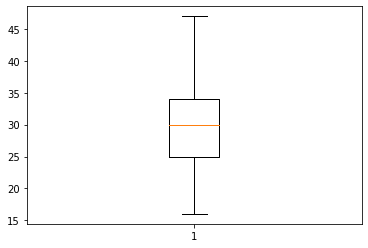

In [11]:
plt.boxplot(df['highwaympg'])
plt.show()

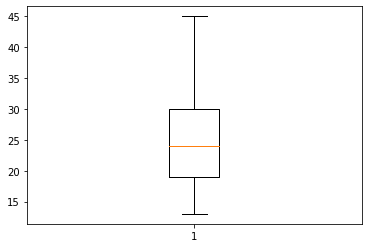

In [12]:
plt.boxplot(df['citympg'])
plt.show()

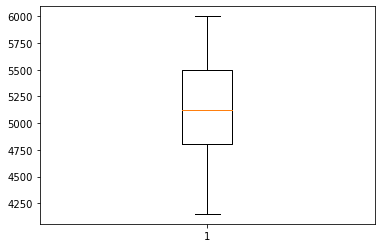

In [13]:
plt.boxplot(df['peakrpm'])
plt.show()

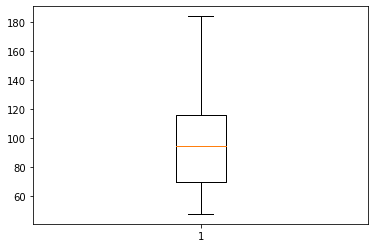

In [14]:
plt.boxplot(df['horsepower'])
plt.show()

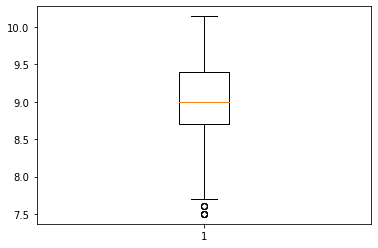

In [15]:
plt.boxplot(df['compressionratio'])
plt.show()

In [16]:
#For column compressionratio
Q1_compressionratio = df.compressionratio.quantile(0.25)
Q3_compressionratio = df.compressionratio.quantile(0.75)
IQR_compressionratio = Q3_compressionratio-Q1_compressionratio

lower_limit_compressionratio = Q1_compressionratio-1.5*IQR_compressionratio
upper_limit_compressionratio = Q3_compressionratio+1.5*IQR_compressionratio
b_compressionratio = upper_limit_compressionratio

for x in ['compressionratio']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_compressionratio
    df.loc[df[x] > max,x] = b_compressionratio

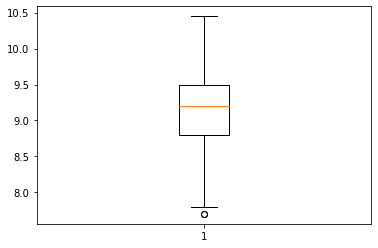

In [17]:
plt.boxplot(df['compressionratio'])
plt.show()

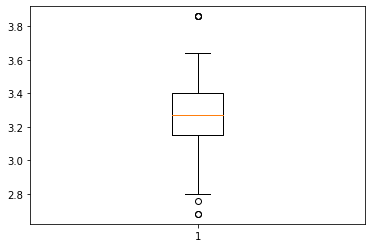

In [18]:
plt.boxplot(df['stroke'])
plt.show()

In [19]:
#For column stroke
Q1_stroke = df.stroke.quantile(0.25)
Q3_stroke = df.stroke.quantile(0.75)
IQR_stroke = Q3_stroke-Q1_stroke

lower_limit_stroke = Q1_stroke-1.5*IQR_stroke
upper_limit_stroke = Q3_stroke+1.5*IQR_stroke
b_stroke = upper_limit_stroke

for x in ['stroke']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_stroke
    df.loc[df[x] > max,x] = b_stroke

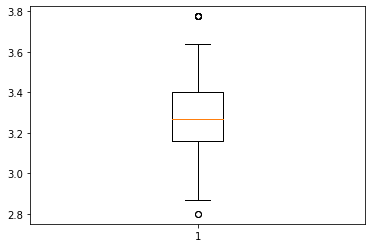

In [20]:
plt.boxplot(df['stroke'])
plt.show()

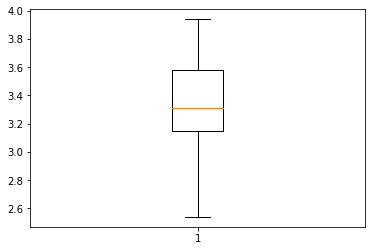

In [21]:
plt.boxplot(df['boreratio'])
plt.show()

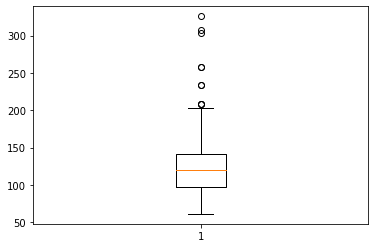

In [22]:
plt.boxplot(df['enginesize'])
plt.show()

In [23]:
#For column enginesize
Q1_enginesize = df.enginesize.quantile(0.25)
Q3_enginesize = df.enginesize.quantile(0.75)
IQR_enginesize = Q3_enginesize-Q1_enginesize

lower_limit_enginesize = Q1_enginesize-1.5*IQR_enginesize
upper_limit_enginesize = Q3_enginesize+1.5*IQR_enginesize
b_enginesize = upper_limit_enginesize

for x in ['enginesize']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_enginesize
    df.loc[df[x] > max,x] = b_enginesize

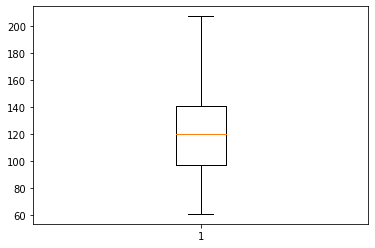

In [24]:
plt.boxplot(df['enginesize'])
plt.show()

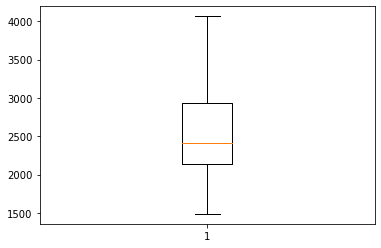

In [25]:
plt.boxplot(df['curbweight'])
plt.show()

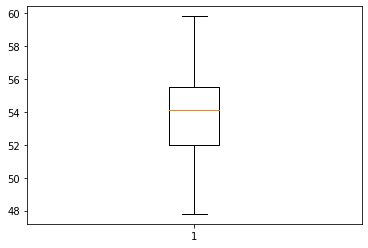

In [26]:
plt.boxplot(df['carheight'])
plt.show()

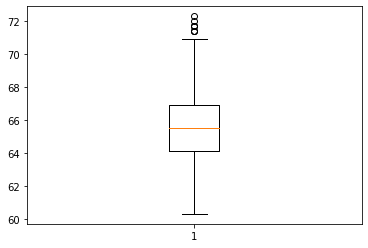

In [27]:
plt.boxplot(df['carwidth'])
plt.show()

In [28]:
#For column carwidth
Q1_carwidth = df.carwidth.quantile(0.25)
Q3_carwidth = df.carwidth.quantile(0.75)
IQR_carwidth = Q3_carwidth-Q1_carwidth

lower_limit_carwidth = Q1_carwidth-1.5*IQR_carwidth
upper_limit_carwidth = Q3_carwidth+1.5*IQR_carwidth
b_carwidth = upper_limit_carwidth

for x in ['carwidth']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_carwidth
    df.loc[df[x] > max,x] = b_carwidth

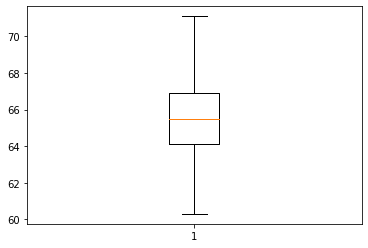

In [29]:
plt.boxplot(df['carwidth'])
plt.show()

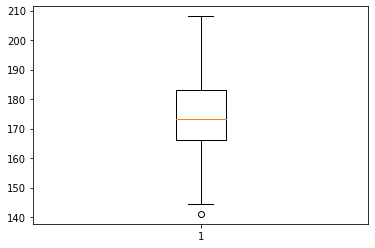

In [30]:
plt.boxplot(df['carlength'])
plt.show()

In [31]:
#For column carlength
Q1_carlength = df.carlength.quantile(0.25)
Q3_carlength = df.carlength.quantile(0.75)
IQR_carlength = Q3_carlength-Q1_carlength

lower_limit_carlength = Q1_carlength-1.5*IQR_carlength
upper_limit_carlength = Q3_carlength+1.5*IQR_carlength
b_carlength = upper_limit_carlength

for x in ['carlength']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_carlength
    df.loc[df[x] > max,x] = b_carlength

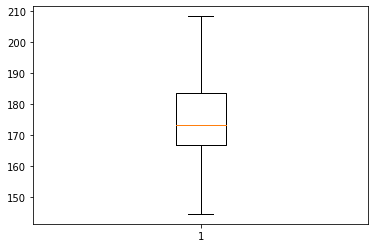

In [32]:
plt.boxplot(df['carlength'])
plt.show()

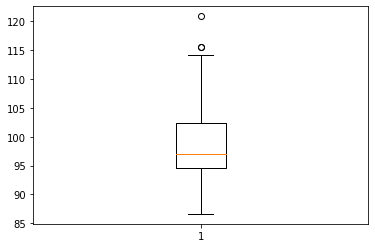

In [33]:
plt.boxplot(df['wheelbase'])
plt.show()

In [34]:
#For column wheelbase
Q1_wheelbase = df.wheelbase.quantile(0.25)
Q3_wheelbase = df.wheelbase.quantile(0.75)
IQR_wheelbase = Q3_wheelbase-Q1_wheelbase

lower_limit_wheelbase = Q1_wheelbase-1.5*IQR_wheelbase
upper_limit_wheelbase = Q3_wheelbase+1.5*IQR_wheelbase
b_wheelbase = upper_limit_wheelbase

for x in ['wheelbase']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = b_wheelbase
    df.loc[df[x] > max,x] = b_wheelbase

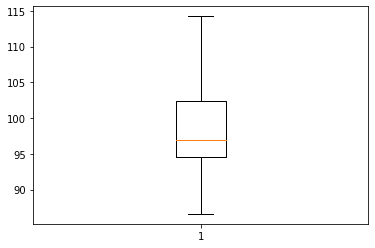

In [35]:
plt.boxplot(df['wheelbase'])
plt.show()

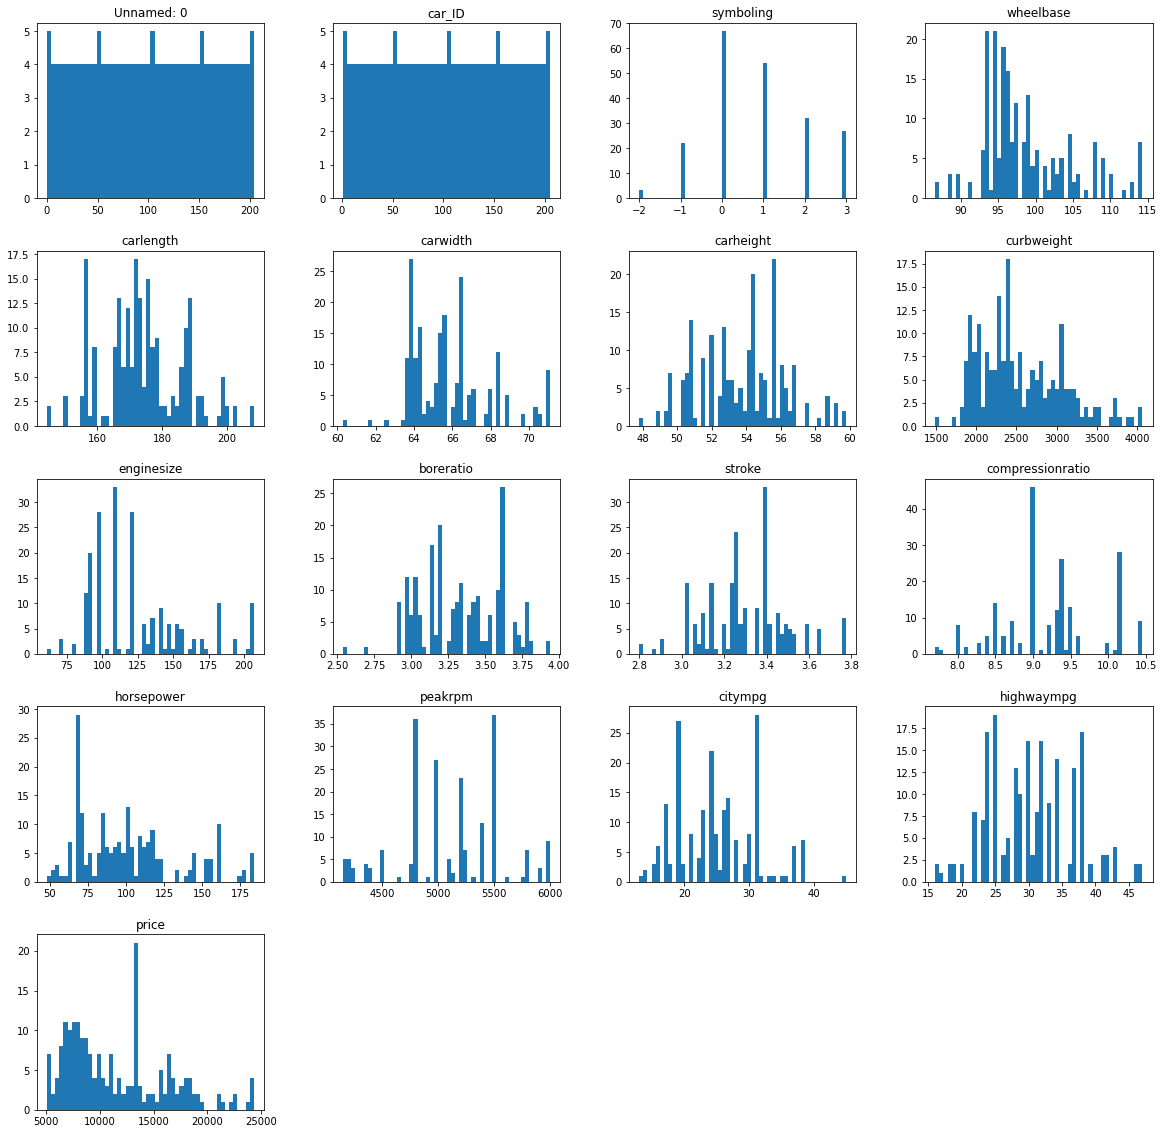

In [36]:
df.hist(grid=False,
       figsize=(20, 20),
       bins=50)
plt.show()

In [41]:
res = df.copy(deep=True)

In [42]:
res.to_csv(r'C:\Users\Lenovo\SSN Study Materials\Processed Dataset\Car Price Prediction Dataset Outliers Treated.csv', index=False)
